In [1]:
#filename : pj03_concat2.ipnb
# 2022-12-06 khm

# 수정 01
# 데이터 제목, 오프닝 중복 제거 (2년치 데이터 붙이면서 중복되는 데이터 제거)
# 중복값 제거, 마지막 항목만 남김 ( 먼저 개봉한 )
# df_dup = df_con.drop_duplicates(subset=['title', 'opening_date'], keep='last')

# 수정 02
# 2010 년 이후 ~ 2019 년 이하 데이터만 남김
#df_time = df_dup[(df_dup['opening_date'] >= '2010-01-01') & (df_dup['opening_date'] < '2020-01-01')]

# 수정 03 (진행중)
# 감독지수, 배우지수

# 수정 04 (진행주)
# 왓차피디아 평점, SNS 지수


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 전처리

In [3]:
def df_clear(data):
    df = data 
    df.columns = ['ranking', 'title', 'opening_date', 'sales',
             'sales_percent', 'sum_sales', 'audience', 'sum_audience', 
            'screens', 'shows', 'main_nation', 'nation', 
              'producer', 'distributor', 'rated', 
              'genre', 'director', 'actor'] 
    df.drop(columns=['ranking', 'sales', 'sales_percent', 'audience', 'nation'], inplace=True) # 필요없는 필드 제거
    df.dropna(subset=['opening_date','genre','director','actor'], inplace=True) # NaN 결측치 제거
    df = df[~df['genre'].str.contains('성인물', na=False)] # 성인물 장르 제거
    df.fillna(value={'rated':'전체관람가'}, inplace=True) # 등급 - 전체관람가 채우기
    return df

#### 데이터 불러오기

In [4]:
df = pd.read_excel('./data/KOBIS_기간별박스오피스_2018-01-01_2019-12-31.xlsx')
df.head(2)

,순위,영화명,개봉일,매출액,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우
0,1,극한직업,2019-01-23,139651845516,0.039,139651845516,16265618,16265618,2003,292584,한국,한국,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",(주)씨제이이엔엠,15세이상관람가,코미디,이병헌,"류승룡,이하늬,진선규,이동휘,공명,양현민,장진희,한준우,김명준,나철,정재광,정원창,..."
1,2,어벤져스: 엔드게임,2019-04-24,122182694160,0.034,122182694160,13934592,13934592,2835,242001,미국,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,12세이상관람가,"액션,SF","안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레..."


In [5]:
df.shape

(6530, 18)

In [6]:
data1 = df_clear(df)
data1.shape

(1634, 13)

In [7]:
data1.head(1)

,title,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,rated,genre,director,actor
0,극한직업,2019-01-23,139651845516,16265618,2003,292584,한국,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",(주)씨제이이엔엠,15세이상관람가,코미디,이병헌,"류승룡,이하늬,진선규,이동휘,공명,양현민,장진희,한준우,김명준,나철,정재광,정원창,..."


In [8]:
df2 = pd.read_excel('./data/KOBIS_기간별박스오피스_2016-01-01_2017-12-31.xlsx')
df2.head(2)

,순위,영화명,개봉일,매출액,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우
0,1,택시운전사,2017-08-02,95853645649,0.029,95853645649,12186327,12186327,1906,184075,한국,한국,더램프(주),(주)쇼박스,15세이상관람가,드라마,장훈,"이수민,송강호,토마스 크레취만,유해진,류준열,박혁권,최귀화,이창섭,이호균,서정우,송..."
1,2,부산행,2016-07-20,93182579048,0.028,93182579048,11566862,11566862,1788,151350,한국,한국,(주)영화사레드피터,(주)넥스트엔터테인먼트월드(NEW),15세이상관람가,"액션,스릴러",연상호,"공유,김정희,정유미,김율호,이주원,이영욱,마동석,김찬호,김운,최우식,안소희,김의성,..."


In [9]:
df2.shape

(5865, 18)

In [10]:
data2 = df_clear(df2)
data2.shape

(2002, 13)

In [11]:
df3 = pd.read_excel('./data/KOBIS_기간별박스오피스_2014-01-01_2015-12-31.xlsx')
df3.head(2)

,순위,영화명,개봉일,매출액,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우
0,1,명량,2014-07-30,135753219310,0.043,135753219310,17615039,17615039,1587,188646,한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,15세이상관람가,"사극,액션",김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,..."
1,2,국제시장,2014-12-17,110930943730,0.035,110930943730,14261581,14261581,1044,212664,한국,한국,"(주)제이케이필름,(주)씨제이이엔엠",(주)씨제이이엔엠,12세이상관람가,드라마,윤제균,"황정민,김윤진,오달수,정진영,장영남,라미란,김슬기,정영기,맹세창,김동원,김현중,김지..."


In [12]:
data3 = df_clear(df3)
data3.shape

(1753, 13)

In [13]:
df4 = pd.read_excel('./data/KOBIS_기간별박스오피스_2012-01-01_2013-12-31.xlsx')
df4.head(2)

,순위,영화명,개봉일,매출액,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우
0,1,도둑들,2012-07-25,93665568500,0.032,93665568500,12983330,12983330,1091,155393,한국,"한국,홍콩",(주)케이퍼필름,(주)쇼박스,15세이상관람가,"액션,범죄",최동훈,"김윤석,김혜수,이정재,전지현,임달화,김해숙,오달수,김수현,이심결,증국상,서영주,장동..."
1,2,7번방의 선물,2013-01-23,91431914670,0.031,91431914670,12811206,12811206,866,166815,한국,한국,"(주)화인웍스,(주)씨엘엔터테인먼트",(주)넥스트엔터테인먼트월드(NEW),15세이상관람가,"코미디,드라마",이환경,"장이준,류승룡,박신혜,갈소원,정진영,오달수,박원상,김정태,정만식,김기천,장호준,김동..."


In [14]:
data4 = df_clear(df4)
data4.shape

(1236, 13)

In [15]:
df5 = pd.read_excel('./data/KOBIS_기간별박스오피스_2010-01-01_2011-12-31.xlsx')
df5.head(2)

,순위,영화명,개봉일,매출액,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수,대표국적,국적,제작사,배급사,등급,장르,감독,배우
0,1,트랜스포머 3,2011-06-29,74840681500,0.034,74840681500,7784743,7784743,1409,124450,미국,미국,NaN,(주)씨제이이엔엠,12세이상관람가,"액션,어드벤처",마이클 베이,"조쉬 더하멜,존 말코비치,로지 헌팅턴-휘틀리,샤이아 라보프,패트릭 뎀시"
1,2,최종병기 활,2011-08-10,55827861500,0.025,55827861500,7470633,7470633,615,130054,한국,한국,"(주)디씨지플러스,(주)다세포클럽",롯데쇼핑㈜롯데엔터테인먼트,15세이상관람가,"사극,액션",김한민,"박해일,류승룡,김무열,문채원,이한위,김구택,이경영,박기웅,이승준,이재구,박노식,이다..."


In [16]:
data5 = df_clear(df5)
data5.shape

(725, 13)

## 데이터 합치기

In [17]:
df_con = pd.concat([data1, data2, data3, data4, data5])
df_con.head(2)

,title,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,rated,genre,director,actor
0,극한직업,2019-01-23,139651845516,16265618,2003,292584,한국,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",(주)씨제이이엔엠,15세이상관람가,코미디,이병헌,"류승룡,이하늬,진선규,이동휘,공명,양현민,장진희,한준우,김명준,나철,정재광,정원창,..."
1,어벤져스: 엔드게임,2019-04-24,122182694160,13934592,2835,242001,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,12세이상관람가,"액션,SF","안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레..."


In [18]:
df_con.shape

(7350, 13)

In [19]:
#데이터 검증
#df_con.to_excel('data_con.xlsx', index=False)

In [20]:
df_con.head()

,title,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,rated,genre,director,actor
0,극한직업,2019-01-23,139651845516,16265618,2003,292584,한국,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",(주)씨제이이엔엠,15세이상관람가,코미디,이병헌,"류승룡,이하늬,진선규,이동휘,공명,양현민,장진희,한준우,김명준,나철,정재광,정원창,..."
1,어벤져스: 엔드게임,2019-04-24,122182694160,13934592,2835,242001,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,12세이상관람가,"액션,SF","안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레..."
2,겨울왕국 2,2019-11-21,111596248720,13369064,2648,282557,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,전체관람가,애니메이션,"크리스 벅,제니퍼 리","크리스틴 벨,이디나 멘젤,조시 게드,조나단 그로프"
3,알라딘,2019-05-23,106955138359,12552283,1409,266469,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,전체관람가,"어드벤처,가족,판타지",가이 리치,"메나 마수드,윌 스미스,나오미 스콧"
4,신과함께-인과 연,2018-08-01,102677675409,12276350,2235,180042,한국,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",롯데컬처웍스(주)롯데엔터테인먼트,12세이상관람가,"판타지,드라마",김용화,"하정우,주지훈,김향기,마동석,김동욱,이정재,김기태,오희준,도경수,이준혁,이수봉,이용..."


In [21]:
df_con.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7350 entries, 0 to 2360
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         7350 non-null   object        
 1   opening_date  7350 non-null   datetime64[ns]
 2   sum_sales     7350 non-null   int64         
 3   sum_audience  7350 non-null   int64         
 4   screens       7350 non-null   int64         
 5   shows         7350 non-null   int64         
 6   main_nation   7350 non-null   object        
 7   producer      3103 non-null   object        
 8   distributor   6134 non-null   object        
 9   rated         7350 non-null   object        
 10  genre         7350 non-null   object        
 11  director      7350 non-null   object        
 12  actor         7350 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 803.9+ KB


## 데이터 제목, 오프닝 중복 제거 (2년치 데이터 붙이면서 중복되는 데이터 제거)

In [22]:
# 중복값 확인
df_con[df_con.duplicated(subset=['title', 'opening_date'], keep=False)].groupby('title').count()

,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,rated,genre,director,actor
title,,,,,,,,,,,,
1987,2,2,2,2,2,2,2,2,2,2,2,2
2012,2,2,2,2,2,2,2,2,2,2,2,2
007 스펙터,2,2,2,2,2,2,0,2,2,2,2,2
127시간,2,2,2,2,2,2,0,2,2,2,2,2
12인의 하숙생,3,3,3,3,3,3,3,0,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
흑룡강,3,3,3,3,3,3,3,0,3,3,3,3
희생,4,4,4,4,4,4,4,0,4,4,4,4
히마와리와 나의 7일,2,2,2,2,2,2,0,2,2,2,2,2


In [23]:
# 중복값 제거, 마지막 항목만 남김 ( 먼저 개봉한 )
df_dup = df_con.drop_duplicates(subset=['title', 'opening_date'], keep='last')

In [24]:
# 중복 값 확인. 없어야 정상
df_dup[df_dup.duplicated(subset=['title', 'opening_date'], keep=False)].groupby('title').count()

,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,rated,genre,director,actor
title,,,,,,,,,,,,


In [25]:
df_dup.shape

(5974, 13)

In [26]:
df_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5974 entries, 0 to 2360
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         5974 non-null   object        
 1   opening_date  5974 non-null   datetime64[ns]
 2   sum_sales     5974 non-null   int64         
 3   sum_audience  5974 non-null   int64         
 4   screens       5974 non-null   int64         
 5   shows         5974 non-null   int64         
 6   main_nation   5974 non-null   object        
 7   producer      2282 non-null   object        
 8   distributor   5174 non-null   object        
 9   rated         5974 non-null   object        
 10  genre         5974 non-null   object        
 11  director      5974 non-null   object        
 12  actor         5974 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 653.4+ KB


In [27]:
df_dup[['title']].value_counts(ascending=True)

title       
33              1
욕망의 쉐어하우스       1
욕망의 라쇼몽 무삭제판    1
욕망의 독: 중독       1
욕망의 대지          1
               ..
유혹              3
카운트다운           3
미녀와 야수          3
몬스터             3
로미오와 줄리엣        3
Length: 5889, dtype: int64

## 2010 년 이후 ~ 2019 년 이하 데이터만 남김

In [28]:
df_time = df_dup[(df_dup['opening_date'] >= '2010-01-01') & (df_dup['opening_date'] < '2020-01-01')]
df_time.head(2)

,title,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,rated,genre,director,actor
0,극한직업,2019-01-23,139651845516,16265618,2003,292584,한국,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",(주)씨제이이엔엠,15세이상관람가,코미디,이병헌,"류승룡,이하늬,진선규,이동휘,공명,양현민,장진희,한준우,김명준,나철,정재광,정원창,..."
1,어벤져스: 엔드게임,2019-04-24,122182694160,13934592,2835,242001,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,12세이상관람가,"액션,SF","안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레..."


In [29]:
#데이터 검증
#df_dup.to_excel('data_dup.xlsx', index=False)

## 10,000 명 미만 관람객수 제거

In [30]:
data = df_time[df_time['sum_audience'] >= 10**4]
data.shape

(1642, 13)

In [31]:
data.reset_index(drop=True, inplace=True)

## 년도 만들기

In [32]:
data['year'] = data.opening_date.dt.year
data.head(5)

,title,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,rated,genre,director,actor,year
0,극한직업,2019-01-23,139651845516,16265618,2003,292584,한국,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",(주)씨제이이엔엠,15세이상관람가,코미디,이병헌,"류승룡,이하늬,진선규,이동휘,공명,양현민,장진희,한준우,김명준,나철,정재광,정원창,...",2019
1,어벤져스: 엔드게임,2019-04-24,122182694160,13934592,2835,242001,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,12세이상관람가,"액션,SF","안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레...",2019
2,겨울왕국 2,2019-11-21,111596248720,13369064,2648,282557,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,전체관람가,애니메이션,"크리스 벅,제니퍼 리","크리스틴 벨,이디나 멘젤,조시 게드,조나단 그로프",2019
3,알라딘,2019-05-23,106955138359,12552283,1409,266469,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,전체관람가,"어드벤처,가족,판타지",가이 리치,"메나 마수드,윌 스미스,나오미 스콧",2019
4,신과함께-인과 연,2018-08-01,102677675409,12276350,2235,180042,한국,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",롯데컬처웍스(주)롯데엔터테인먼트,12세이상관람가,"판타지,드라마",김용화,"하정우,주지훈,김향기,마동석,김동욱,이정재,김기태,오희준,도경수,이준혁,이수봉,이용...",2018


In [33]:
#데이터 검증
data.to_excel('data_mv.xlsx', index=False)

## 감독 지수

In [34]:
data['dir_pre_cnt'] = int(0) # 이전 작품 수
data['dir_pre_aud'] = data['sum_audience'] # 이전 누적 관객수

In [35]:
dir_count = data[['title','director']].groupby('director').count()
dir_count = dir_count.reset_index()
dir_count

,director,title
0,D.J. 카루소,2
1,F. 게리 그레이,3
2,J 블레이크슨,1
3,J.J. 에이브럼스,3
4,M. 나이트 샤말란,5
...,...,...
1114,후안 안토니오 바요나,2
1115,후쿠다 유이치,1
1116,히라야마 미호,1
1117,히라오 타카유키,1


In [36]:
dir_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   director  1119 non-null   object
 1   title     1119 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 17.6+ KB


In [37]:
dir_data = data.sort_values(by=['director','title', 'opening_date'])
dir_data.head()

,title,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,rated,genre,director,actor,year,dir_pre_cnt,dir_pre_aud
1401,아이 엠 넘버 포,2011-02-24,4955215500,654386,284,22145,미국,NaN,한국소니픽쳐스릴리징브에나비스타영화㈜,12세이상관람가,"액션,SF",D.J. 카루소,"티모시 올리펀트,알렉스 페티퍼",2011,0,654386
468,트리플 엑스 리턴즈,2017-02-08,3967335095,475309,590,20692,미국,NaN,롯데쇼핑㈜롯데엔터테인먼트,15세이상관람가,"액션,어드벤처,스릴러",D.J. 카루소,"빈 디젤,사무엘 L. 잭슨,루비 로즈,니나 도브레브,토니 콜렛,디피카 파드콘,토니 자",2017,0,475309
104,맨 인 블랙: 인터내셔널,2019-06-12,7464209570,851917,1151,40520,미국,NaN,롯데컬처웍스(주)롯데엔터테인먼트,12세이상관람가,"액션,코미디,SF",F. 게리 그레이,"크리스 헴스워스,테사 톰슨,리암 니슨,엠마 톰슨",2019,0,851917
351,분노의 질주: 더 익스트림,2017-04-12,29981156348,3653238,1469,113241,미국,NaN,유니버설픽쳐스인터내셔널 코리아(유),15세이상관람가,"액션,범죄,스릴러",F. 게리 그레이,"빈 디젤,드웨인 존슨,샤를리즈 테론,제이슨 스타뎀,스콧 이스트우드,커트 러셀,미셸 ...",2017,0,3653238
895,스트레이트 아웃 오브 컴턴,2015-09-10,412749800,48844,185,2766,미국,NaN,유니버설픽쳐스인터내셔널 코리아(유),청소년관람불가,드라마,F. 게리 그레이,"오셔 잭슨 주니어,코리 호킨스,제이슨 미첼,닐 브라운 주니어,알디스 호지,폴 지아마티",2015,0,48844


In [38]:
dir_count.loc[0,['director']]

director    D.J. 카루소
Name: 0, dtype: object

In [39]:
tmp_data = dir_data[dir_data['director']=='D.J. 카루소'].sort_values(by=['opening_date'])
tmp_data

,title,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,rated,genre,director,actor,year,dir_pre_cnt,dir_pre_aud
1401,아이 엠 넘버 포,2011-02-24,4955215500,654386,284,22145,미국,NaN,한국소니픽쳐스릴리징브에나비스타영화㈜,12세이상관람가,"액션,SF",D.J. 카루소,"티모시 올리펀트,알렉스 페티퍼",2011,0,654386
468,트리플 엑스 리턴즈,2017-02-08,3967335095,475309,590,20692,미국,NaN,롯데쇼핑㈜롯데엔터테인먼트,15세이상관람가,"액션,어드벤처,스릴러",D.J. 카루소,"빈 디젤,사무엘 L. 잭슨,루비 로즈,니나 도브레브,토니 콜렛,디피카 파드콘,토니 자",2017,0,475309


In [40]:
# 수정중
def dir_pre_add(dir_count, dir_data): 
    for i in range(0, len(dir_count)):
        name     = dir_count.loc[i,'director']  
        count    = dir_count.loc[i,'title']   # title 이지만 count 값을 나타냄
        tmp_data = dir_data[dir_data['director']==name].sort_values(by=['opening_date'])

        k = 0
        if (count == len(tmp_data)):
            for j in range(0, len(tmp_data)):
                # if k == 0:
                    #print(f"{j} dir_pre_cnt:{tmp_data.loc[j,'dir_pre_cnt']}, dir_pre_aud:{tmp_data.loc[j,'dir_pre_aud']}")
                if  (k > 1):
                    tmp_data.index[j]['dir_pre_cnt'] = k
                    tmp_data.index[j]['dir_pre_aud'] = tmp_data.index[j,'dir_pre_aud'] + tmp_data.index[j-1,'dir_pre_aud']
                    #print(f"{j} dir_pre_cnt:{tmp_data.loc[j,'dir_pre_cnt']}, dir_pre_aud:{tmp_data.loc[j,'dir_pre_aud']}")
                k += 1

In [41]:
## 왓차 평점 붙이기

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         1642 non-null   object        
 1   opening_date  1642 non-null   datetime64[ns]
 2   sum_sales     1642 non-null   int64         
 3   sum_audience  1642 non-null   int64         
 4   screens       1642 non-null   int64         
 5   shows         1642 non-null   int64         
 6   main_nation   1642 non-null   object        
 7   producer      731 non-null    object        
 8   distributor   1642 non-null   object        
 9   rated         1642 non-null   object        
 10  genre         1642 non-null   object        
 11  director      1642 non-null   object        
 12  actor         1642 non-null   object        
 13  year          1642 non-null   int64         
 14  dir_pre_cnt   1642 non-null   int64         
 15  dir_pre_aud   1642 non-null   int64   

In [43]:
from watcha2 import watchapedia

In [44]:
movie_list = []
for i in range(1, len(data)):
    a_dict = { 'title': str(data.iloc[i]['title']) , 'year': str(data.iloc[i]['year'])}
    movie_list.append(a_dict)

In [45]:
#성공
test_list = [{'title': '알라딘', 'year': '2019'}, {'title': '겨울왕국 2', 'year': '2019'}]
#못찾음 , 왓차는 극한직업 2018 로 되어 이음
test_list2 =  [{'title': '극한직업', 'year': '2019'}]
test_list3 =  [{'title': '월ㆍE', 'year': '2008'}]

In [46]:
w = watchapedia(test_list)
a = w.getMovieUrl()
mv_data = w.getMovieData()
mv_data

(2022/12/07 10:17:56 AM) [INFO] watcha2.getMovieData(): 
{'알라딘': {'year': '2019', 'genres': '모험/가족/판타지', 'rating': '3.9', 'views': 230000, 'director': ['가이 리치'], 'main': ['미나 마수드', '윌 스미스', '나오미 스콧']}, '겨울왕국 2': {'year': '2019', 'genres': '애니메이션/모험/코미디', 'rating': '3.6', 'views': 170000, 'director': ['크리스 벅', '제니퍼 리'], 'main': []}}

runtime: 5.0335초 (watcha2.py:82)



{'알라딘': {'year': '2019',
  'genres': '모험/가족/판타지',
  'rating': '3.9',
  'views': 230000,
  'director': ['가이 리치'],
  'main': ['미나 마수드', '윌 스미스', '나오미 스콧']},
 '겨울왕국 2': {'year': '2019',
  'genres': '애니메이션/모험/코미디',
  'rating': '3.6',
  'views': 170000,
  'director': ['크리스 벅', '제니퍼 리'],
  'main': []}}

## 분류

### 전처리

In [47]:
# df = data.copy()

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         1642 non-null   object        
 1   opening_date  1642 non-null   datetime64[ns]
 2   sum_sales     1642 non-null   int64         
 3   sum_audience  1642 non-null   int64         
 4   screens       1642 non-null   int64         
 5   shows         1642 non-null   int64         
 6   main_nation   1642 non-null   object        
 7   producer      731 non-null    object        
 8   distributor   1642 non-null   object        
 9   rated         1642 non-null   object        
 10  genre         1642 non-null   object        
 11  director      1642 non-null   object        
 12  actor         1642 non-null   object        
 13  year          1642 non-null   int64         
 14  dir_pre_cnt   1642 non-null   int64         
 15  dir_pre_aud   1642 non-null   int64   

In [49]:
data.columns

Index(['title', 'opening_date', 'sum_sales', 'sum_audience', 'screens',
       'shows', 'main_nation', 'producer', 'distributor', 'rated', 'genre',
       'director', 'actor', 'year', 'dir_pre_cnt', 'dir_pre_aud'],
      dtype='object')

#### 년, 월, 일, 요일 뽑아서 숫자데이터로

In [50]:
# data['month'] = data.opening_date.dt.month
# data.head(5)

In [51]:
# data['day'] = data.opening_date.dt.day
# data.head(5)

In [52]:
# data['weekday'] = data.opening_date.dt.weekday
# data.head(5)


#### 관람등급 인코딩

In [53]:
# 관람등급 확인
data.rated.unique()

array(['15세이상관람가', '12세이상관람가', '전체관람가', '청소년관람불가'], dtype=object)

In [54]:
rated_new = pd.get_dummies(data['rated'])

In [55]:
rated_new

,12세이상관람가,15세이상관람가,전체관람가,청소년관람불가
0,0,1,0,0
1,1,0,0,0
2,0,0,1,0
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
1637,0,0,1,0
1638,0,0,0,1
1639,0,0,1,0
1640,0,0,1,0


In [56]:
rated_new.columns = ['rated_12', 'rated_15', 'rated_all', 'rated_19']
rated_new

,rated_12,rated_15,rated_all,rated_19
0,0,1,0,0
1,1,0,0,0
2,0,0,1,0
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
1637,0,0,1,0
1638,0,0,0,1
1639,0,0,1,0
1640,0,0,1,0


In [57]:
data.drop(columns=['rated'],inplace=True)
data = pd.concat([data,rated_new],axis=1)
data.head()

,title,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,genre,director,actor,year,dir_pre_cnt,dir_pre_aud,rated_12,rated_15,rated_all,rated_19
0,극한직업,2019-01-23,139651845516,16265618,2003,292584,한국,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",(주)씨제이이엔엠,코미디,이병헌,"류승룡,이하늬,진선규,이동휘,공명,양현민,장진희,한준우,김명준,나철,정재광,정원창,...",2019,0,16265618,0,1,0,0
1,어벤져스: 엔드게임,2019-04-24,122182694160,13934592,2835,242001,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,"액션,SF","안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레...",2019,0,13934592,1,0,0,0
2,겨울왕국 2,2019-11-21,111596248720,13369064,2648,282557,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,애니메이션,"크리스 벅,제니퍼 리","크리스틴 벨,이디나 멘젤,조시 게드,조나단 그로프",2019,0,13369064,0,0,1,0
3,알라딘,2019-05-23,106955138359,12552283,1409,266469,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,"어드벤처,가족,판타지",가이 리치,"메나 마수드,윌 스미스,나오미 스콧",2019,0,12552283,0,0,1,0
4,신과함께-인과 연,2018-08-01,102677675409,12276350,2235,180042,한국,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",롯데컬처웍스(주)롯데엔터테인먼트,"판타지,드라마",김용화,"하정우,주지훈,김향기,마동석,김동욱,이정재,김기태,오희준,도경수,이준혁,이수봉,이용...",2018,0,12276350,1,0,0,0


#### 장르 인코딩

In [58]:
data['genre'] = data.genre.str.split(',').str.get(0)

In [59]:
data.genre.value_counts()

액션          355
애니메이션       290
드라마         269
코미디         141
공포(호러)       92
범죄           83
스릴러          81
멜로/로맨스       79
SF           52
미스터리         46
판타지          38
사극           35
어드벤처         33
가족           18
전쟁            9
다큐멘터리         7
공연            6
뮤지컬           5
기타            2
서부극(웨스턴)      1
Name: genre, dtype: int64

In [60]:
data['genre'].mask(data['genre'] == '공연', '기타', inplace=True)
data['genre'].mask(data['genre'] == '뮤지컬', '기타', inplace=True)
data['genre'].mask(data['genre'] == '서부극(웨스턴)', '기타', inplace=True)
data['genre'].mask(data['genre'] == 'SF', 'SF/판타지', inplace=True)
data['genre'].mask(data['genre'] == '판타지', 'SF/판타지', inplace=True)

In [61]:
# 장르 변경 확인
data.genre.value_counts()

액션        355
애니메이션     290
드라마       269
코미디       141
공포(호러)     92
SF/판타지     90
범죄         83
스릴러        81
멜로/로맨스     79
미스터리       46
사극         35
어드벤처       33
가족         18
기타         14
전쟁          9
다큐멘터리       7
Name: genre, dtype: int64

In [62]:
genre_new = pd.get_dummies(data['genre'])
genre_new

,SF/판타지,가족,공포(호러),기타,다큐멘터리,드라마,멜로/로맨스,미스터리,범죄,사극,스릴러,애니메이션,액션,어드벤처,전쟁,코미디
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1638,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1639,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1640,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [63]:
genre_new.columns = ['fantasy',
                     'family',
                     'horror',
                     'etc',
                     'documentary',
                     'drama',
                     'romance',
                     'mystery',
                     'crime',
                     'historical',
                     'thriller',
                     'animation',
                     'action',
                     'adventure',
                     'war',
                     'comedy'
                    ]
genre_new

,fantasy,family,horror,etc,documentary,drama,romance,mystery,crime,historical,thriller,animation,action,adventure,war,comedy
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1638,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1639,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1640,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [64]:
data.drop(columns=['genre'],inplace=True)
data = pd.concat([data,genre_new],axis=1)
data.head()

,title,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,director,...,romance,mystery,crime,historical,thriller,animation,action,adventure,war,comedy
0,극한직업,2019-01-23,139651845516,16265618,2003,292584,한국,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",(주)씨제이이엔엠,이병헌,...,0,0,0,0,0,0,0,0,0,1
1,어벤져스: 엔드게임,2019-04-24,122182694160,13934592,2835,242001,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,"안소니 루소,조 루소",...,0,0,0,0,0,0,1,0,0,0
2,겨울왕국 2,2019-11-21,111596248720,13369064,2648,282557,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,"크리스 벅,제니퍼 리",...,0,0,0,0,0,1,0,0,0,0
3,알라딘,2019-05-23,106955138359,12552283,1409,266469,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,가이 리치,...,0,0,0,0,0,0,0,1,0,0
4,신과함께-인과 연,2018-08-01,102677675409,12276350,2235,180042,한국,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",롯데컬처웍스(주)롯데엔터테인먼트,김용화,...,0,0,0,0,0,0,0,0,0,0


In [65]:
# 중간확인
# data.to_excel('data_encording.xlsx', index=False)

#### 사용하지 않을 컬럼 삭제

In [66]:
# 컬럼 확인
data.columns

Index(['title', 'opening_date', 'sum_sales', 'sum_audience', 'screens',
       'shows', 'main_nation', 'producer', 'distributor', 'director', 'actor',
       'year', 'dir_pre_cnt', 'dir_pre_aud', 'rated_12', 'rated_15',
       'rated_all', 'rated_19', 'fantasy', 'family', 'horror', 'etc',
       'documentary', 'drama', 'romance', 'mystery', 'crime', 'historical',
       'thriller', 'animation', 'action', 'adventure', 'war', 'comedy'],
      dtype='object')

In [67]:
# 사용하지 않을 컬럼 삭제
data.drop(columns=['title', 'opening_date', 'sum_sales', 'main_nation', 'producer', 'distributor', 'director', 'actor']).columns

Index(['sum_audience', 'screens', 'shows', 'year', 'dir_pre_cnt',
       'dir_pre_aud', 'rated_12', 'rated_15', 'rated_all', 'rated_19',
       'fantasy', 'family', 'horror', 'etc', 'documentary', 'drama', 'romance',
       'mystery', 'crime', 'historical', 'thriller', 'animation', 'action',
       'adventure', 'war', 'comedy'],
      dtype='object')

In [68]:
data = data.drop(columns=['title', 'opening_date', 'sum_sales', 'main_nation', 'producer', 'distributor', 'director', 'actor'])

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   sum_audience  1642 non-null   int64
 1   screens       1642 non-null   int64
 2   shows         1642 non-null   int64
 3   year          1642 non-null   int64
 4   dir_pre_cnt   1642 non-null   int64
 5   dir_pre_aud   1642 non-null   int64
 6   rated_12      1642 non-null   uint8
 7   rated_15      1642 non-null   uint8
 8   rated_all     1642 non-null   uint8
 9   rated_19      1642 non-null   uint8
 10  fantasy       1642 non-null   uint8
 11  family        1642 non-null   uint8
 12  horror        1642 non-null   uint8
 13  etc           1642 non-null   uint8
 14  documentary   1642 non-null   uint8
 15  drama         1642 non-null   uint8
 16  romance       1642 non-null   uint8
 17  mystery       1642 non-null   uint8
 18  crime         1642 non-null   uint8
 19  historical    1642 non-null

## 박스오피스 관람객수에 따른 흥행등급 나누기

In [70]:
# 박스오피스 관람객수에 따른 흥행등급 나누기
def box_office(sum_audience):
    cat = 0
    if sum_audience < 1000000: cat = 0 
    elif sum_audience < 5000000 : cat = 1
    elif sum_audience < 7000000 : cat = 2
    elif sum_audience < 10000000 : cat = 3
    else : cat = 4
    return cat

def box_office2(sum_audience):
    cat = 0
    if sum_audience < 5000000: cat = 0 
    else : cat = 1
    return cat

data['box_office'] = data['sum_audience'].apply(lambda x : box_office2(x))
data.sample(5)

,sum_audience,screens,shows,year,dir_pre_cnt,dir_pre_aud,rated_12,rated_15,rated_all,rated_19,...,mystery,crime,historical,thriller,animation,action,adventure,war,comedy,box_office
1195,90926,243,4733,2012,0,90926,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
479,401541,691,26356,2017,0,401541,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
201,172212,624,11245,2019,0,172212,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
832,179738,449,9991,2015,0,179738,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
722,1128288,607,36990,2015,0,1128288,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [71]:
data[data['sum_audience'] > 10000000].count()

sum_audience    19
screens         19
shows           19
year            19
dir_pre_cnt     19
dir_pre_aud     19
rated_12        19
rated_15        19
rated_all       19
rated_19        19
fantasy         19
family          19
horror          19
etc             19
documentary     19
drama           19
romance         19
mystery         19
crime           19
historical      19
thriller        19
animation       19
action          19
adventure       19
war             19
comedy          19
box_office      19
dtype: int64

In [72]:
data['box_office'].value_counts()

0    1557
1      85
Name: box_office, dtype: int64

In [73]:
# df_box_offfice = df['box_office'].value_counts()

(array([1557.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          85.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

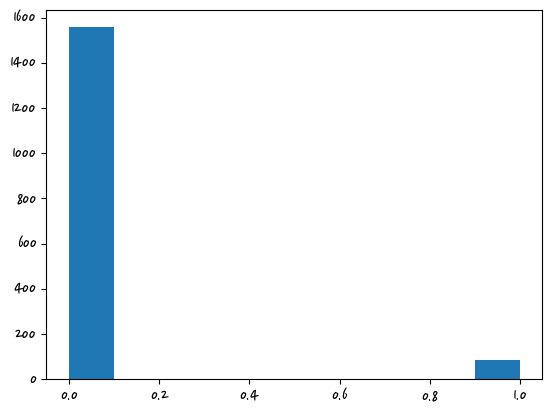

In [74]:
plt.hist(data['box_office'])

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [76]:
y = data['box_office']
X = data.drop(columns=['box_office', 'sum_audience', 'year', 'dir_pre_cnt', 'dir_pre_aud'])

In [77]:
dt_clf = DecisionTreeClassifier()

In [78]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)

In [79]:
X_train

,screens,shows,rated_12,rated_15,rated_all,rated_19,fantasy,family,horror,etc,...,romance,mystery,crime,historical,thriller,animation,action,adventure,war,comedy
417,659,34444,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
821,386,9994,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
554,422,10270,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
790,419,12908,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1095,464,8994,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,273,1291,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
13,1972,144779,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1348,496,45188,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
814,317,6703,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [80]:
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
accuracy_score(y_test, dt_pred)

0.9635258358662614

In [81]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


In [82]:
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier()

y = data['box_office']
X = data.drop(columns=['box_office', 'sum_audience', 'year', 'dir_pre_cnt', 'dir_pre_aud'])
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)

In [83]:
models = [dt_clf, rf_clf, lr_clf, knn_clf]
for model in models:
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    model_name = model.__class__.__name__
    print(f'{model_name} 정확도 : {accuracy_score(y_test,pred)}')

DecisionTreeClassifier 정확도 : 0.9544072948328267
RandomForestClassifier 정확도 : 0.9574468085106383
LogisticRegression 정확도 : 0.9665653495440729
KNeighborsClassifier 정확도 : 0.9635258358662614


In [84]:
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier()

y = data['box_office']
X = data.drop(columns=['screens', 'shows', 'box_office', 'sum_audience', 'year', 'dir_pre_cnt', 'dir_pre_aud'])
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)

In [85]:
models = [dt_clf, rf_clf, lr_clf, knn_clf]
for model in models:
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    model_name = model.__class__.__name__
    print(f'{model_name} 정확도 : {accuracy_score(y_test,pred)}')

DecisionTreeClassifier 정확도 : 0.9452887537993921
RandomForestClassifier 정확도 : 0.9452887537993921
LogisticRegression 정확도 : 0.9452887537993921
KNeighborsClassifier 정확도 : 0.9452887537993921


In [86]:
data.columns


Index(['sum_audience', 'screens', 'shows', 'year', 'dir_pre_cnt',
       'dir_pre_aud', 'rated_12', 'rated_15', 'rated_all', 'rated_19',
       'fantasy', 'family', 'horror', 'etc', 'documentary', 'drama', 'romance',
       'mystery', 'crime', 'historical', 'thriller', 'animation', 'action',
       'adventure', 'war', 'comedy', 'box_office'],
      dtype='object')